In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sweetviz as sv
import seaborn as sns
from scipy.stats import zscore
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import fcluster
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import KMeans 
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report ,confusion_matrix

from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

### Problem 1: Clustering

#### A leading bank wants to develop a customer segmentation to give promotional offers to its customers. They collected a sample that summarizes the activities of users during the past few months. You are given the task to identify the segments based on credit card usage.

#### 1.1 Read the data, do the necessary initial steps, and exploratory data analysis (Univariate, Bi-variate, and multivariate analysis).

In [2]:
bank_df = pd.read_csv("bank_marketing_part1_Data-1.csv")

In [3]:
bank_df.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837


In [4]:
bank_df.describe()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,14.847524,14.559286,0.870999,5.628533,3.258605,3.700201,5.408071
std,2.909699,1.305959,0.023629,0.443063,0.377714,1.503557,0.491480
min,10.590000,12.410000,0.808100,4.899000,2.630000,0.765100,4.519000
25%,12.270000,13.450000,0.856900,5.262250,2.944000,2.561500,5.045000
50%,14.355000,14.320000,0.873450,5.523500,3.237000,3.599000,5.223000
75%,17.305000,15.715000,0.887775,5.979750,3.561750,4.768750,5.877000
max,21.180000,17.250000,0.918300,6.675000,4.033000,8.456000,6.550000


In [5]:
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   spending                      210 non-null    float64
 1   advance_payments              210 non-null    float64
 2   probability_of_full_payment   210 non-null    float64
 3   current_balance               210 non-null    float64
 4   credit_limit                  210 non-null    float64
 5   min_payment_amt               210 non-null    float64
 6   max_spent_in_single_shopping  210 non-null    float64
dtypes: float64(7)
memory usage: 11.6 KB


In [6]:
bank_customer_Segment= sv.analyze(bank_df)

In [7]:
bcs=bank_customer_Segment.show_html('Bank_Customer_Segment.html')
bcs

Report Bank_Customer_Segment.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [8]:
print("Number of Duplicates",bank_df.duplicated().sum())

Number of Duplicates 0


<AxesSubplot:>

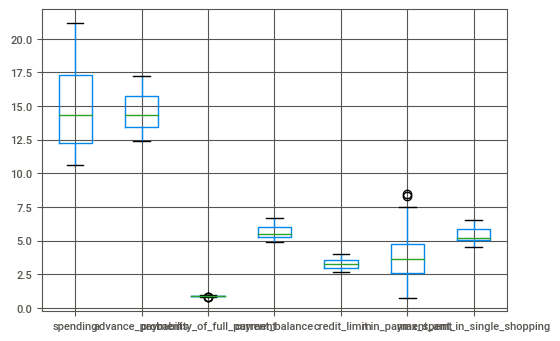

In [9]:
bank_df.boxplot()

#### 1.2  Do you think scaling is necessary for clustering in this case? Justify

#### Yes, The Scaling is required asthe data set cointains diffrent range of values . Clustering uses  sort of distance measure                ( ex :euclidean distance) to determine if the data belong to particular class .So if there is a diffrence in range of values of data between variables It will affect the clustering determination as Higher weitage variable may get more preference .So scaling is required in clustering . In this data also we neeed to do clustering cos there are diffrence in range of values between columns. For example spending mean is 14.8 whreas probability of full payment mean is 0.8709.

In [10]:
bank_scale=bank_df.apply(zscore)
bank_scale.describe()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
count,2.100000e+02,2.100000e+02,2.100000e+02,2.100000e+02,2.100000e+02,2.100000e+02,2.100000e+02
mean,9.148766e-16,1.097006e-16,1.260896e-15,-1.358702e-16,-2.790757e-16,5.418946e-16,-1.935489e-15
std,1.002389e+00,1.002389e+00,1.002389e+00,1.002389e+00,1.002389e+00,1.002389e+00,1.002389e+00
min,-1.466714e+00,-1.649686e+00,-2.668236e+00,-1.650501e+00,-1.668209e+00,-1.956769e+00,-1.813288e+00
25%,-8.879552e-01,-8.514330e-01,-5.980791e-01,-8.286816e-01,-8.349072e-01,-7.591477e-01,-7.404953e-01
50%,-1.696741e-01,-1.836639e-01,1.039927e-01,-2.376280e-01,-5.733534e-02,-6.746852e-02,-3.774588e-01
75%,8.465989e-01,8.870693e-01,7.116771e-01,7.945947e-01,8.044956e-01,7.123789e-01,9.563941e-01
max,2.181534e+00,2.065260e+00,2.006586e+00,2.367533e+00,2.055112e+00,3.170590e+00,2.328998e+00


#### 1.3 Apply hierarchical clustering to scaled data. Identify the number of optimum clusters using Dendrogram and briefly describe them

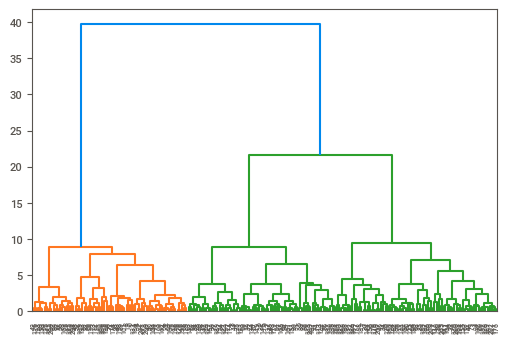

In [11]:
wardlink = linkage(bank_scale, method = 'ward')
dnd = dendrogram(wardlink)

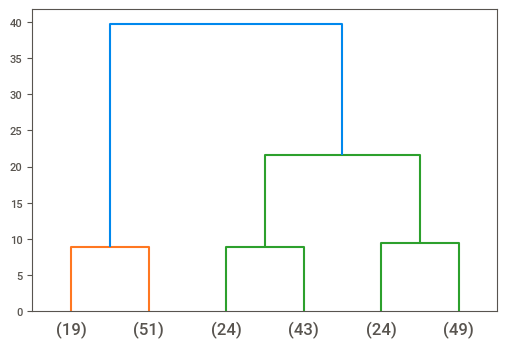

In [12]:
dnd = dendrogram(wardlink,
                 truncate_mode='lastp',
                 p =6,
                 )

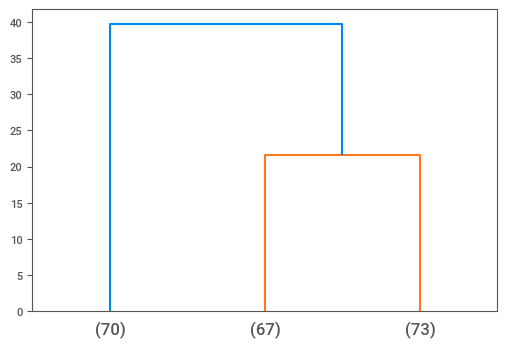

In [13]:
dnd = dendrogram(wardlink,
                 truncate_mode='lastp',
                 p =3,
                 )

In [14]:
clusters = fcluster(wardlink, 3, criterion='maxclust')
clusters

array([1, 3, 1, 2, 1, 2, 2, 3, 1, 2, 1, 3, 2, 1, 3, 2, 3, 2, 3, 2, 2, 2,
       1, 2, 3, 1, 3, 2, 2, 2, 3, 2, 2, 3, 2, 2, 2, 2, 2, 1, 1, 3, 1, 1,
       2, 2, 3, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1, 3, 2, 2, 3, 3, 1,
       1, 3, 1, 2, 3, 2, 1, 1, 2, 1, 3, 2, 1, 3, 3, 3, 3, 1, 2, 3, 3, 1,
       1, 2, 3, 1, 3, 2, 2, 1, 1, 1, 2, 1, 2, 1, 3, 1, 3, 1, 1, 2, 2, 1,
       3, 3, 1, 2, 2, 1, 3, 3, 2, 1, 3, 2, 2, 2, 3, 3, 1, 2, 3, 3, 2, 3,
       3, 1, 2, 1, 1, 2, 1, 3, 3, 3, 2, 2, 3, 2, 1, 2, 3, 2, 3, 2, 3, 3,
       3, 3, 3, 2, 3, 1, 1, 2, 1, 1, 1, 2, 1, 3, 3, 3, 3, 2, 3, 1, 1, 1,
       3, 3, 1, 2, 3, 3, 3, 3, 1, 1, 3, 3, 3, 2, 3, 3, 2, 1, 3, 1, 1, 2,
       1, 2, 3, 1, 3, 2, 1, 3, 1, 3, 1, 3], dtype=int32)

In [15]:
hierarchicaldata= bank_df.copy()

In [16]:
hierarchicaldata['cluster']=clusters
hierarchicaldata.head(10)

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,cluster
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550,1
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144,3
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148,1
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185,2
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837,1
5,12.70,13.41,0.8874,5.183,3.091,8.456,5.000,2
6,12.02,13.33,0.8503,5.350,2.810,4.271,5.308,2
7,13.74,14.05,0.8744,5.482,3.114,2.932,4.825,3
8,18.17,16.26,0.8637,6.271,3.512,2.853,6.273,1
9,11.23,12.88,0.8511,5.140,2.795,4.325,5.003,2


In [17]:
hclustr=hierarchicaldata.groupby('cluster').describe().T
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(hclustr)

cluster                                     1          2          3
spending                     count  70.000000  67.000000  73.000000
                             mean   18.371429  11.872388  14.199041
                             std     1.381233   0.735848   1.230930
                             min    15.380000  10.590000  11.230000
                             25%    17.330000  11.250000  13.500000
                             50%    18.720000  11.830000  14.330000
                             75%    19.137500  12.450000  15.030000
                             max    21.180000  13.370000  16.630000
advance_payments             count  70.000000  67.000000  73.000000
                             mean   16.145429  13.257015  14.233562
                             std     0.599277   0.353348   0.600399
                             min    14.860000  12.410000  12.630000
                             25%    15.737500  13.000000  13.850000
                             50%    16.210000  1

#### 1.4 Apply K-Means clustering on scaled data and determine optimum clusters. Apply elbow curve and silhouette score. Explain the results properly. Interpret and write inferences on the finalized clusters.

In [18]:
wss =[]
for i in range(1,11):
    KM = KMeans(n_clusters=i)
    KM.fit(bank_scale)
    wss.append(KM.inertia_)

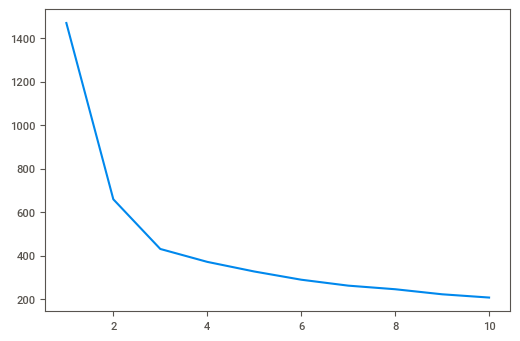

In [19]:
plt.plot(range(1,11), wss)

In [20]:
k_means = KMeans(n_clusters = 3)
k_means.fit(bank_scale)
labels = k_means.labels_

In [21]:
k_means2 = KMeans(n_clusters = 2)
k_means2.fit(bank_scale)
k_means2.inertia_

659.171754487041

In [22]:
k_means4 = KMeans(n_clusters = 4)
k_means4.fit(bank_scale)
k_means4.inertia_

371.29354819439664

In [23]:
k_means5 = KMeans(n_clusters = 5)
k_means5.fit(bank_scale)
k_means5.inertia_

327.3281094192775

In [24]:
interia= k_means.inertia_
interia

430.6589731513006

In [25]:
kmeansdata= bank_df.copy()

In [26]:
bank_df["Clus_kmeans"] = labels
bank_df.head(5)

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,Clus_kmeans
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550,1
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144,0
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148,1
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185,2
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837,1


In [27]:
silhouette_score(bank_scale,labels)

0.4007270552751299

In [28]:
sil_width = silhouette_samples(bank_scale,labels)
bank_df["sil_width"] = sil_width

bank_df.head(5)

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,Clus_kmeans,sil_width
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550,1,0.573699
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144,0,0.366386
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148,1,0.637784
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185,2,0.512458
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837,1,0.362276


In [29]:
dataprofile=bank_df.groupby('Clus_kmeans').describe().T
dataprofile


Clus_kmeans              0          1          2
spending  count  71.000000  67.000000  72.000000
          mean   14.437887  18.495373  11.856944
          std     1.056513   1.277122   0.714801
          min    12.080000  15.560000  10.590000
          25%    13.820000  17.590000  11.255000
...                    ...        ...        ...
sil_width min     0.005457   0.029792   0.002713
          25%     0.234095   0.419827   0.314599
          50%     0.371077   0.523482   0.453462
          75%     0.479615   0.574340   0.515146
          max     0.554103   0.639285   0.587277

[64 rows x 3 columns]

#### 1.5 Describe cluster profiles for the clusters defined. Recommend different promotional strategies for different clusters.

In [30]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(dataprofile)

Clus_kmeans                                 0          1          2
spending                     count  71.000000  67.000000  72.000000
                             mean   14.437887  18.495373  11.856944
                             std     1.056513   1.277122   0.714801
                             min    12.080000  15.560000  10.590000
                             25%    13.820000  17.590000  11.255000
                             50%    14.430000  18.750000  11.825000
                             75%    15.260000  19.145000  12.395000
                             max    16.440000  21.180000  13.340000
advance_payments             count  71.000000  67.000000  72.000000
                             mean   14.337746  16.203433  13.247778
                             std     0.525706   0.546439   0.355208
                             min    13.150000  14.890000  12.410000
                             25%    14.030000  15.855000  12.992500
                             50%    14.390000  1

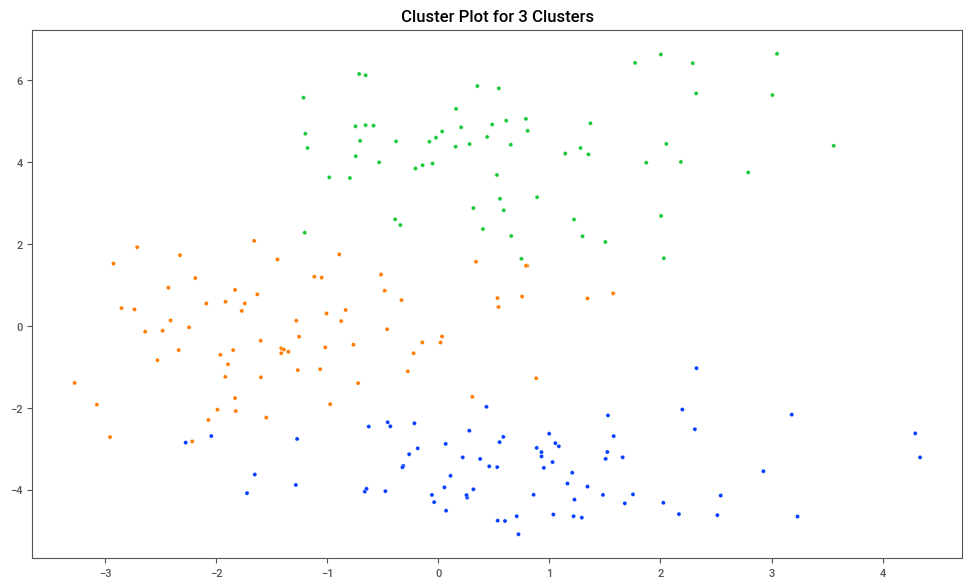

In [31]:
from sklearn.decomposition import PCA
pca_3 = PCA(3)
plot_columns = pca_3.fit_transform(bank_df)
plt.figure(figsize=(12,7))
sns.scatterplot(x=plot_columns[:,1], y=plot_columns[:,0], hue=KMeans(n_clusters=
3, random_state=0).fit(bank_df).labels_, palette='bright',legend=False)
plt.title('Cluster Plot for 3 Clusters')
plt.show()

### Problem 2: CART-RF-ANN
#### An Insurance firm providing tour insurance is facing higher claim frequency. The management decides to collect data from the past few years. You are assigned the task to make a model which predicts the claim status and provide recommendations to management. Use CART, RF & ANN and compare the models' performances in train and test sets.

#### 2.1 Read the data, do the necessary initial steps, and exploratory data analysis (Univariate, Bi-variate, and multivariate analysis).

In [32]:
insurance_df = pd.read_csv("insurance_part2_data-2.csv")

In [33]:
insurance_df.head()

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,C2B,Airlines,No,0.70,Online,7,2.51,Customised Plan,ASIA
1,36,EPX,Travel Agency,No,0.00,Online,34,20.00,Customised Plan,ASIA
2,39,CWT,Travel Agency,No,5.94,Online,3,9.90,Customised Plan,Americas
3,36,EPX,Travel Agency,No,0.00,Online,4,26.00,Cancellation Plan,ASIA
4,33,JZI,Airlines,No,6.30,Online,53,18.00,Bronze Plan,ASIA


In [34]:
insurance_df.describe()

,Age,Commision,Duration,Sales
count,3000.000000,3000.000000,3000.000000,3000.000000
mean,38.091000,14.529203,70.001333,60.249913
std,10.463518,25.481455,134.053313,70.733954
min,8.000000,0.000000,-1.000000,0.000000
25%,32.000000,0.000000,11.000000,20.000000
50%,36.000000,4.630000,26.500000,33.000000
75%,42.000000,17.235000,63.000000,69.000000
max,84.000000,210.210000,4580.000000,539.000000


In [35]:
insurance_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           3000 non-null   int64  
 1   Agency_Code   3000 non-null   object 
 2   Type          3000 non-null   object 
 3   Claimed       3000 non-null   object 
 4   Commision     3000 non-null   float64
 5   Channel       3000 non-null   object 
 6   Duration      3000 non-null   int64  
 7   Sales         3000 non-null   float64
 8   Product Name  3000 non-null   object 
 9   Destination   3000 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 234.5+ KB


In [36]:
insurancereport= sv.analyze(insurance_df)

In [37]:
irh=insurancereport.show_html('insurance claim report.html')
irh

Report insurance claim report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [38]:
print("Number of Duplicates ",insurance_df.duplicated().sum())

Number of Duplicates  139


In [39]:
print("Removing duplicates")

insurance_df=insurance_df.drop_duplicates( keep='last')

insurance_df.info()

Removing duplicates
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2861 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           2861 non-null   int64  
 1   Agency_Code   2861 non-null   object 
 2   Type          2861 non-null   object 
 3   Claimed       2861 non-null   object 
 4   Commision     2861 non-null   float64
 5   Channel       2861 non-null   object 
 6   Duration      2861 non-null   int64  
 7   Sales         2861 non-null   float64
 8   Product Name  2861 non-null   object 
 9   Destination   2861 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 245.9+ KB


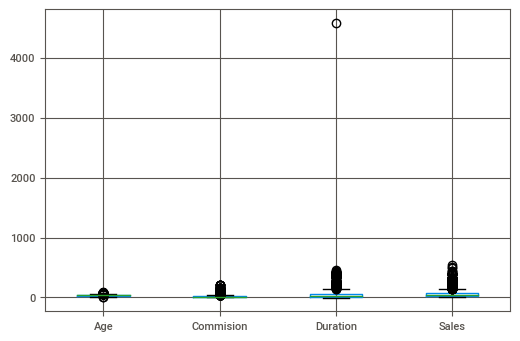

In [40]:
boxplot = insurance_df.boxplot()


In [41]:
# outlier

from scipy import stats
numeric_cols = insurance_df.select_dtypes(include=[np.number]).columns

z=np.abs(stats.zscore(insurance_df[numeric_cols]))

listin= np.where(z>3)

outlier = list((int(j) for i in listin for j in i)) 
print("the number of outliers are ", len(outlier) )

the number of outliers are  290


In [42]:
print("replace outliers")

def outlier(x):
    # taking 5,25,75 percentile of column
    q5= np.percentile(x,5)
    q25=np.percentile(x,25)
    q75=np.percentile(x,75)
    dt=np.percentile(x,95)
    #calculationg IQR range
    IQR=q75-q25
    #Calculating minimum threshold
    lower_bound=q25-(1.5*IQR)
    upper_bound=q75+(1.5*IQR)
    #Calculating maximum threshold
    return x.apply(lambda y: dt if y > upper_bound else y).apply(lambda y: q5 if y < lower_bound else y)


insurance_df[numeric_cols]=insurance_df[numeric_cols].apply(outlier)
insurance_df.head()

replace outliers


,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,48.0,C2B,Airlines,No,0.70,Online,7.0,2.51,Customised Plan,ASIA
2,39.0,CWT,Travel Agency,No,5.94,Online,3.0,9.90,Customised Plan,Americas
3,36.0,EPX,Travel Agency,No,0.00,Online,4.0,26.00,Cancellation Plan,ASIA
4,33.0,JZI,Airlines,No,6.30,Online,53.0,18.00,Bronze Plan,ASIA
5,45.0,JZI,Airlines,Yes,15.75,Online,8.0,45.00,Bronze Plan,ASIA


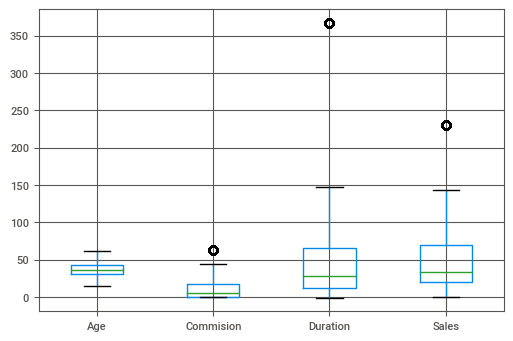

In [43]:
boxplot = insurance_df.boxplot()

#### 2.2 Data Split: Split the data into test and train, build classification model CART, Random Forest, Artificial Neural Network

In [44]:
insurance= insurance_df.copy()

In [45]:
for feature in insurance.columns: 
    if insurance[feature].dtype == 'object':
        insurance[feature] = pd.Categorical(insurance[feature]).codes
insurance.head()


,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,48.0,0,0,0,0.70,1,7.0,2.51,2,0
2,39.0,1,1,0,5.94,1,3.0,9.90,2,1
3,36.0,2,1,0,0.00,1,4.0,26.00,1,0
4,33.0,3,0,0,6.30,1,53.0,18.00,0,0
5,45.0,3,0,1,15.75,1,8.0,45.00,0,0


In [46]:
insurance['Claimed'].sum()

914

In [47]:
X = insurance.copy()

X =X.drop("Claimed" , axis=1)

y = insurance.copy()
y = y.pop("Claimed")
X.head()


,Age,Agency_Code,Type,Commision,Channel,Duration,Sales,Product Name,Destination
0,48.0,0,0,0.70,1,7.0,2.51,2,0
2,39.0,1,1,5.94,1,3.0,9.90,2,1
3,36.0,2,1,0.00,1,4.0,26.00,1,0
4,33.0,3,0,6.30,1,53.0,18.00,0,0
5,45.0,3,0,15.75,1,8.0,45.00,0,0


In [48]:
y.head()

0    0
2    0
3    0
4    0
5    1
Name: Claimed, dtype: int8

In [49]:
# splitting data into training and test set for independent attributes
from sklearn.model_selection import train_test_split

X_train, X_test, train_labels, test_labels = train_test_split(X, y, test_size=.30, random_state=1)

In [50]:
X_train.head()

,Age,Agency_Code,Type,Commision,Channel,Duration,Sales,Product Name,Destination
1347,21.0,3,0,11.55,1,65.0,33.0,0,0
2362,35.0,0,0,15.60,1,22.0,39.0,0,0
947,39.0,0,0,63.21,1,367.0,230.0,4,0
218,51.0,0,0,63.21,1,367.0,230.0,4,0
2340,28.0,2,1,0.00,1,3.0,10.0,1,0


In [51]:
X_test.head()

,Age,Agency_Code,Type,Commision,Channel,Duration,Sales,Product Name,Destination
684,19.0,0,0,6.00,1,12.0,15.0,0,0
231,27.0,1,1,17.82,1,16.0,29.7,2,1
1729,27.0,0,0,63.21,1,367.0,230.0,4,0
1005,36.0,2,1,0.00,1,5.0,73.0,1,0
848,58.0,0,0,5.25,1,51.0,21.0,0,0


In [52]:
train_labels.head()

1347    0
2362    0
947     1
218     1
2340    0
Name: Claimed, dtype: int8

In [53]:
test_labels.head()

684     0
231     0
1729    0
1005    0
848     1
Name: Claimed, dtype: int8

#### Decision Tree Classifier

In [54]:
dt_model = DecisionTreeClassifier(criterion = 'gini' )
dt_model.fit(X_train, train_labels)

DecisionTreeClassifier()

In [55]:
from sklearn import tree

train_char_label = ['No', 'Yes']
insurance_Tree_File = open('insurancetree.dot','w')
dot_data = tree.export_graphviz(dt_model, out_file=insurance_Tree_File, feature_names = list(X_train), class_names = list(train_char_label))

insurance_Tree_File.close()

In [56]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [2, 3, 4, 5],
    'min_samples_leaf': [20, 25, 30],
    'min_samples_split': [80, 100, 120]
}

dt_model = DecisionTreeClassifier()

grid_search = GridSearchCV(estimator = dt_model, param_grid = param_grid, cv = 4)

In [57]:
grid_search.fit(X_train, train_labels)

GridSearchCV(cv=4, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [2, 3, 4, 5],
                         'min_samples_leaf': [20, 25, 30],
                         'min_samples_split': [80, 100, 120]})

In [58]:
grid_search.best_params_

{'max_depth': 3, 'min_samples_leaf': 20, 'min_samples_split': 100}

In [59]:
dtbest_grid = grid_search.best_estimator_
dtbest_grid

DecisionTreeClassifier(max_depth=3, min_samples_leaf=20, min_samples_split=100)

In [60]:
train_char_label = ['No', 'Yes']
insurance_Tree_File = open('insurancetree.dot','w')
dot_data = tree.export_graphviz(dtbest_grid, out_file=insurance_Tree_File, feature_names = list(X_train), class_names = list(train_char_label))

insurance_Tree_File.close()

In [61]:
dtytrain_predict = dtbest_grid.predict(X_train)
dtytest_predict = dtbest_grid.predict(X_test)

In [62]:
print(classification_report(train_labels,dtytrain_predict))

              precision    recall  f1-score   support

           0       0.81      0.86      0.84      1347
           1       0.67      0.58      0.62       655

    accuracy                           0.77      2002
   macro avg       0.74      0.72      0.73      2002
weighted avg       0.76      0.77      0.77      2002



In [63]:
print(classification_report(test_labels,dtytest_predict))

              precision    recall  f1-score   support

           0       0.83      0.84      0.83       600
           1       0.62      0.60      0.61       259

    accuracy                           0.77       859
   macro avg       0.72      0.72      0.72       859
weighted avg       0.77      0.77      0.77       859



#### Random Forest Classifier

In [64]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [5,6,7,8],
    'min_samples_leaf': [20, 25,30],
    'min_samples_split': [80,100,120],
    'n_estimators': [ 101, 201]
}

rfcl = RandomForestClassifier()

grid_search = GridSearchCV(estimator = rfcl, param_grid = param_grid)

In [65]:
grid_search.fit(X_train, train_labels)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': [5, 6, 7, 8],
                         'min_samples_leaf': [20, 25, 30],
                         'min_samples_split': [80, 100, 120],
                         'n_estimators': [101, 201]})

In [66]:
grid_search.best_params_

{'max_depth': 7,
 'min_samples_leaf': 25,
 'min_samples_split': 80,
 'n_estimators': 101}

In [67]:
rfcbest_grid = grid_search.best_estimator_
rfcbest_grid

RandomForestClassifier(max_depth=7, min_samples_leaf=25, min_samples_split=80,
                       n_estimators=101)

In [68]:
rfcytrain_predict = rfcbest_grid.predict(X_train)
rfcytest_predict = rfcbest_grid.predict(X_test)

In [69]:
print(classification_report(train_labels,rfcytrain_predict))

              precision    recall  f1-score   support

           0       0.82      0.89      0.85      1347
           1       0.72      0.60      0.65       655

    accuracy                           0.79      2002
   macro avg       0.77      0.74      0.75      2002
weighted avg       0.79      0.79      0.79      2002



In [70]:
print(classification_report(test_labels,rfcytest_predict))

              precision    recall  f1-score   support

           0       0.83      0.85      0.84       600
           1       0.63      0.60      0.62       259

    accuracy                           0.77       859
   macro avg       0.73      0.72      0.73       859
weighted avg       0.77      0.77      0.77       859



#### MLP Classifier (Artificial Neural Network)

In [71]:
from sklearn.preprocessing import StandardScaler 
sc = StandardScaler() 
X_trains = sc.fit_transform(X_train) 
X_tests = sc.transform (X_test)

In [72]:
param_grid = {
    'hidden_layer_sizes': [(100,100,100),(200,200,200),(300,300,300)],
    'activation': ['logistic', 'relu'],
    'solver': ['sgd', 'adam'],
    'tol': [0.1,0.01],
    'max_iter' : [10000,5000]
}

rfcl = MLPClassifier()

grid_search = GridSearchCV(estimator = rfcl, param_grid = param_grid, cv = 3)

In [73]:
grid_search.fit(X_trains, train_labels)

GridSearchCV(cv=3, estimator=MLPClassifier(),
             param_grid={'activation': ['logistic', 'relu'],
                         'hidden_layer_sizes': [(100, 100, 100),
                                                (200, 200, 200),
                                                (300, 300, 300)],
                         'max_iter': [10000, 5000], 'solver': ['sgd', 'adam'],
                         'tol': [0.1, 0.01]})

In [74]:
grid_search.best_params_

{'activation': 'relu',
 'hidden_layer_sizes': (100, 100, 100),
 'max_iter': 5000,
 'solver': 'adam',
 'tol': 0.1}

In [75]:
anbest_grid = grid_search.best_estimator_
anbest_grid

MLPClassifier(hidden_layer_sizes=(100, 100, 100), max_iter=5000, tol=0.1)

In [76]:
anytrain_predict = anbest_grid.predict(X_trains)
anytest_predict = anbest_grid.predict(X_tests)

In [77]:
print(classification_report(train_labels,anytrain_predict))

              precision    recall  f1-score   support

           0       0.81      0.85      0.83      1347
           1       0.67      0.60      0.63       655

    accuracy                           0.77      2002
   macro avg       0.74      0.73      0.73      2002
weighted avg       0.77      0.77      0.77      2002



In [78]:
print(classification_report(test_labels,anytest_predict))

              precision    recall  f1-score   support

           0       0.83      0.83      0.83       600
           1       0.61      0.62      0.62       259

    accuracy                           0.77       859
   macro avg       0.72      0.72      0.72       859
weighted avg       0.77      0.77      0.77       859



#### 2.3 Performance Metrics: Comment and Check the performance of Predictions on Train and Test sets using Accuracy, Confusion Matrix, Plot ROC curve and get ROC_AUC score, classification reports for each model. 

#### CART decision tree

In [79]:
dtbest_grid.score(X_train,train_labels)


0.7707292707292708

In [80]:
dtbest_grid.score(X_test,test_labels)

0.7671711292200233

In [81]:
confusion_matrix(train_labels, dtytrain_predict)

array([[1164,  183],
       [ 276,  379]], dtype=int64)

In [82]:
confusion_matrix(test_labels,dtytest_predict)

array([[503,  97],
       [103, 156]], dtype=int64)

Area under Curve is 0.8007.


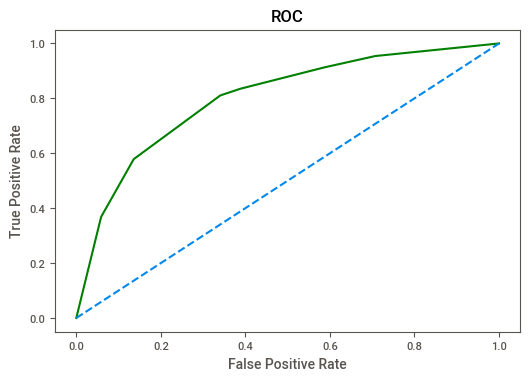

In [83]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
insurance_train_fpr, insurance_train_tpr,_= roc_curve(train_labels,dtbest_grid.predict_proba(X_train)[:,1])
plt.plot(insurance_train_fpr, insurance_train_tpr,color='green')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
insurance_train_auc=roc_auc_score(train_labels,dtbest_grid.predict_proba(X_train)[:,1])
print('Area under Curve is %.4f.' % insurance_train_auc)

Area under Curve is 0.7869.


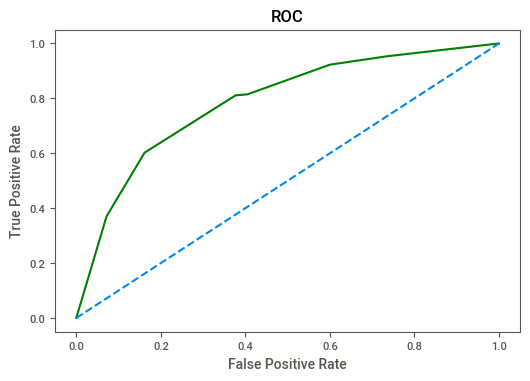

In [84]:
insurance_test_fpr, insurance_test_tpr,_=roc_curve(test_labels,dtbest_grid.predict_proba(X_test)[:,1])
plt.plot(insurance_test_fpr, insurance_test_tpr,color='green')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
insurance_test_auc=roc_auc_score(test_labels,dtbest_grid.predict_proba(X_test)[:,1])
print('Area under Curve is %.4f.' % insurance_test_auc)

#### Random Forest Classifier

In [85]:
rfcbest_grid.score(X_train,train_labels)

0.7922077922077922

In [86]:
rfcbest_grid.score(X_test,test_labels)

0.7729918509895227

In [87]:
confusion_matrix(train_labels, rfcytrain_predict)

array([[1196,  151],
       [ 265,  390]], dtype=int64)

In [88]:
confusion_matrix(test_labels,rfcytest_predict)

array([[508,  92],
       [103, 156]], dtype=int64)

Area under Curve is 0.8359.


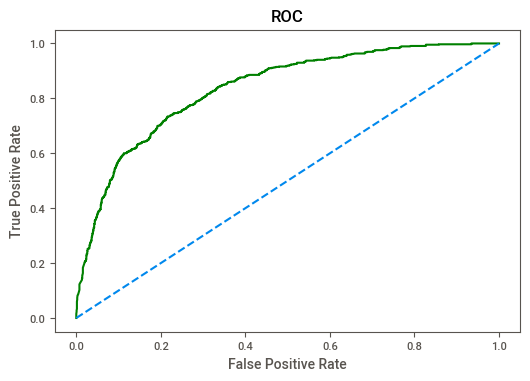

In [89]:
rf_train_fpr, rf_train_tpr,_=roc_curve(train_labels,rfcbest_grid.predict_proba(X_train)[:,1])
plt.plot(rf_train_fpr,rf_train_tpr,color='green')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
rf_train_auc=roc_auc_score(train_labels,rfcbest_grid.predict_proba(X_train)[:,1])
print('Area under Curve is %.4f.' % rf_train_auc)


Area under Curve is 0.8013.


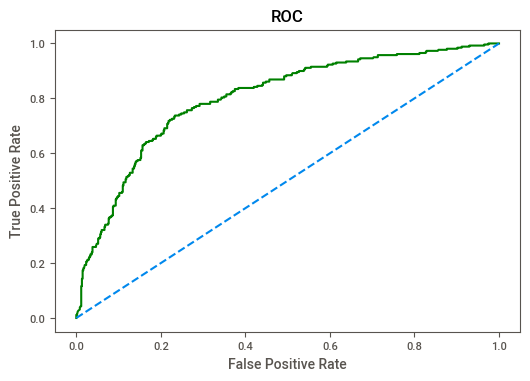

In [90]:
rf_test_fpr, rf_test_tpr,_=roc_curve(test_labels,rfcbest_grid.predict_proba(X_test)[:,1])
plt.plot(rf_test_fpr,rf_test_tpr,color='green')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
rf_test_auc=roc_auc_score(test_labels,rfcbest_grid.predict_proba(X_test)[:,1])
print('Area under Curve is %.4f.' % rf_test_auc)

#### MLP Classifier (Artificial Neural Network)

In [91]:
anbest_grid.score(X_trains,train_labels)

0.7707292707292708

In [92]:
anbest_grid.score(X_tests,test_labels)

0.7671711292200233

In [93]:
confusion_matrix(train_labels, anytrain_predict)

array([[1151,  196],
       [ 263,  392]], dtype=int64)

In [94]:
confusion_matrix(test_labels,anytest_predict)

array([[499, 101],
       [ 99, 160]], dtype=int64)

Area under Curve is 0.8082.


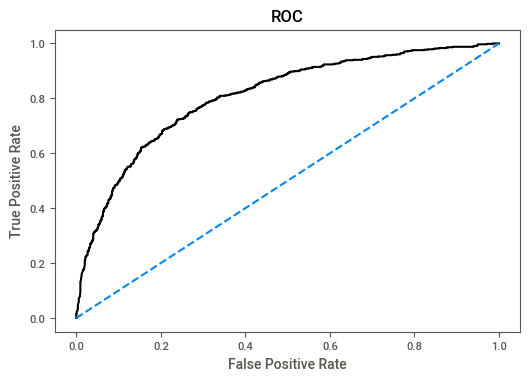

In [95]:
nn_train_fpr, nn_train_tpr,_=roc_curve(train_labels,anbest_grid.predict_proba(X_trains)[:,1])
plt.plot(nn_train_fpr,nn_train_tpr,color='black')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
nn_train_auc=roc_auc_score(train_labels,anbest_grid.predict_proba(X_trains)[:,1])
print('Area under Curve is %.4f.' % nn_train_auc)

Area under Curve is 0.7903.


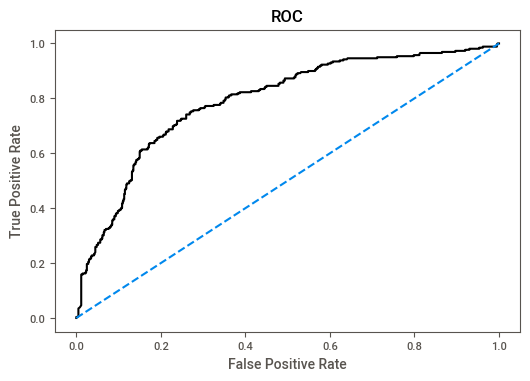

In [96]:
nn_test_fpr, nn_test_tpr,_=roc_curve(test_labels,anbest_grid.predict_proba(X_tests)[:,1])
plt.plot(nn_test_fpr,nn_test_tpr,color='black')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
nn_test_auc=roc_auc_score(test_labels,anbest_grid.predict_proba(X_tests)[:,1])
print('Area under Curve is %.4f.' %nn_test_auc)

#### 2.4 Final Model: Compare all the models and write an inference which model is best/optimized.

#### DECISION TREE

In [97]:
print(classification_report(train_labels,dtytrain_predict))

              precision    recall  f1-score   support

           0       0.81      0.86      0.84      1347
           1       0.67      0.58      0.62       655

    accuracy                           0.77      2002
   macro avg       0.74      0.72      0.73      2002
weighted avg       0.76      0.77      0.77      2002



In [98]:
print(classification_report(test_labels,dtytest_predict))

              precision    recall  f1-score   support

           0       0.83      0.84      0.83       600
           1       0.62      0.60      0.61       259

    accuracy                           0.77       859
   macro avg       0.72      0.72      0.72       859
weighted avg       0.77      0.77      0.77       859



#### Random forest

In [99]:
print(classification_report(train_labels,rfcytrain_predict))

              precision    recall  f1-score   support

           0       0.82      0.89      0.85      1347
           1       0.72      0.60      0.65       655

    accuracy                           0.79      2002
   macro avg       0.77      0.74      0.75      2002
weighted avg       0.79      0.79      0.79      2002



In [100]:
print(classification_report(test_labels,rfcytest_predict))

              precision    recall  f1-score   support

           0       0.83      0.85      0.84       600
           1       0.63      0.60      0.62       259

    accuracy                           0.77       859
   macro avg       0.73      0.72      0.73       859
weighted avg       0.77      0.77      0.77       859



#### ANN

In [101]:
print(classification_report(train_labels,anytrain_predict))

              precision    recall  f1-score   support

           0       0.81      0.85      0.83      1347
           1       0.67      0.60      0.63       655

    accuracy                           0.77      2002
   macro avg       0.74      0.73      0.73      2002
weighted avg       0.77      0.77      0.77      2002



In [102]:
print(classification_report(test_labels,anytest_predict))

              precision    recall  f1-score   support

           0       0.83      0.83      0.83       600
           1       0.61      0.62      0.62       259

    accuracy                           0.77       859
   macro avg       0.72      0.72      0.72       859
weighted avg       0.77      0.77      0.77       859



#### ANN (Artificial Neural Network) IS BEST

In [106]:
## Comparison
data = {'Cart Train':[0.77,0.80,0.58,0.67,0.62],
        'Cart Test':[0.77,0.78,0.60,0.62,0.61],
       'Random Forest Train':[0.79,0.84,0.60,0.72,0.65],
       'Random Forest Test':[0.77,0.80,0.60,0.63,0.62],
       'Neural Network Train':[0.77,0.81,0.60,0.67,0.63],
       'Neural Network Test':[0.76,0.79,0.62,0.61,0.62]}
  
df = pd.DataFrame(data, index =['Accuracy',
                                'AUC',
                                'Recall',
                                'Precision',
                                'F1 Score'])
df

,Cart Train,Cart Test,Random Forest Train,Random Forest Test,Neural Network Train,Neural Network Test
Accuracy,0.77,0.77,0.79,0.77,0.77,0.76
AUC,0.80,0.78,0.84,0.80,0.81,0.79
Recall,0.58,0.60,0.60,0.60,0.60,0.62
Precision,0.67,0.62,0.72,0.63,0.67,0.61
F1 Score,0.62,0.61,0.65,0.62,0.63,0.62


#### Comparing AUC

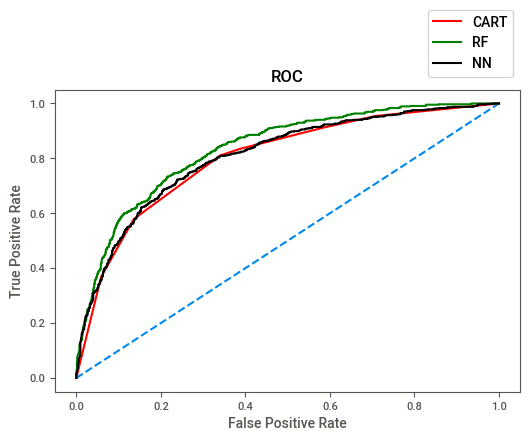

In [104]:
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(insurance_train_fpr, insurance_train_tpr,color='red',label="CART")
plt.plot(rf_train_fpr,rf_train_tpr,color='green',label="RF")
plt.plot(nn_train_fpr,nn_train_tpr,color='black',label="NN")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right')

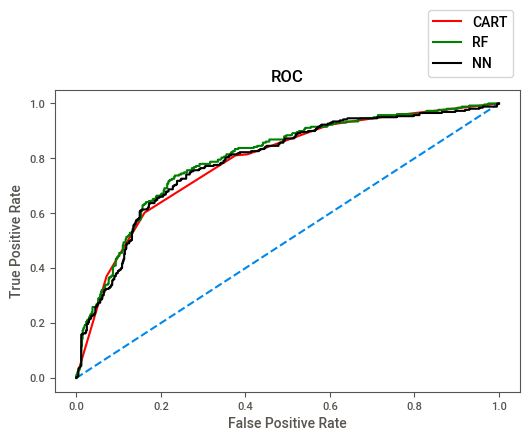

In [105]:
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(insurance_test_fpr,insurance_test_tpr,color='red',label="CART")
plt.plot(rf_test_fpr,rf_test_tpr,color='green',label="RF")
plt.plot(nn_test_fpr,nn_test_tpr,color='black',label="NN")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right')